In [121]:
from __future__ import division, print_function
__author__ = 'Avikal Somvanshi'
#Importing functions as used in Lab2
import os
import numpy as np
from numpy.random import randn
import pylab as pl

from pandas import Series, DataFrame
import pandas
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


data = os.getenv("DFDATA")
#Checking that an environmental variable DFDATA exists and that it points to the data facility 
#location /gws/open/NYCOpenData/nycopendata/data/
print (data)

/gws/open/NYCOpenData/nycopendata/data


In [122]:
# setting up preferences as used in Lab2

%pylab inline

np.set_printoptions(precision=4, threshold=500)
np.random.seed(123321)
pl.rc('figure', figsize=(10, 6))
pd.options.display.max_rows = 100

Populating the interactive namespace from numpy and matplotlib


In [123]:
#Importing Energy and Water Data Disclosure for Local Law 84 (2012) from CUSP database 
# Citation: URL: https://data.cityofnewyork.us/resource/zkky-n5j3.csv

df_water = pd.read_csv(data + "/zkky-n5j3/1414246141/zkky-n5j3") #reading CSV using pandas
#Displaying the top few rows of the DF 
df_water.head()


,Neversink Date,Neversink Elevation,Neversink Storage,Rondout Date,Rondout Elevation,Rondout Storage,Schoharie Date,Schoharie Elevation,Schoharie Storage,Cannonsville Date,...,Cannonsville Storage,Pepacton Date,Pepacton Elevation,Pepacton Storage,Ashokan East Date,Ashokan East Elevation,Ashokan East Storage,Ashokan West Date,Ashokan West Elevation,Ashokan West Storage
0,03/01/2005 04:00:00 PM +0000,1440.21,35570,03/01/2005 04:00:00 PM +0000,835.10,46757.0,03/01/2005 04:00:00 PM +0000,1130.09,19618.0,03/02/2005 04:00:00 PM +0000,...,97257.0,03/01/2005 04:00:00 PM +0000,1277.42,138986,03/01/2005 04:00:00 PM +0000,586.61,79856,03/01/2005 04:00:00 PM +0000,587.24,44432.0
1,03/02/2005 04:00:00 PM +0000,1440.22,35575,03/02/2005 04:00:00 PM +0000,834.98,46678.0,03/02/2005 04:00:00 PM +0000,1130.07,19610.0,03/03/2005 04:00:00 PM +0000,...,97193.0,03/02/2005 04:00:00 PM +0000,1277.26,138696,03/02/2005 04:00:00 PM +0000,586.61,79856,03/02/2005 04:00:00 PM +0000,586.93,44123.0
2,03/03/2005 04:00:00 PM +0000,1440.21,35570,03/03/2005 04:00:00 PM +0000,834.84,46585.0,03/03/2005 04:00:00 PM +0000,1130.05,19602.0,03/04/2005 04:00:00 PM +0000,...,97080.0,03/03/2005 04:00:00 PM +0000,1277.10,138406,03/03/2005 04:00:00 PM +0000,586.60,79839,03/03/2005 04:00:00 PM +0000,586.61,43804.0
3,03/04/2005 04:00:00 PM +0000,1440.21,35570,03/04/2005 04:00:00 PM +0000,834.85,46592.0,03/04/2005 04:00:00 PM +0000,1130.04,19599.0,03/05/2005 04:00:00 PM +0000,...,96951.0,03/04/2005 04:00:00 PM +0000,1276.90,138045,03/04/2005 04:00:00 PM +0000,586.61,79856,03/04/2005 04:00:00 PM +0000,586.31,43505.0
4,03/05/2005 04:00:00 PM +0000,1440.21,35570,03/05/2005 04:00:00 PM +0000,834.88,46612.0,03/05/2005 04:00:00 PM +0000,1130.04,19599.0,03/06/2005 04:00:00 PM +0000,...,96680.0,03/05/2005 04:00:00 PM +0000,1276.72,137721,03/05/2005 04:00:00 PM +0000,586.61,79856,03/05/2005 04:00:00 PM +0000,586.00,43197.0


In [124]:
#Removing all but one numerical values column and one date-time column
water = df_water[[0, 2]]
water.head()

,Neversink Date,Neversink Storage
0,03/01/2005 04:00:00 PM +0000,35570
1,03/02/2005 04:00:00 PM +0000,35575
2,03/03/2005 04:00:00 PM +0000,35570
3,03/04/2005 04:00:00 PM +0000,35570
4,03/05/2005 04:00:00 PM +0000,35570


In [125]:
# Renaming the columns for sake of simplicity
water.columns=["x","y"]
water.head()

,x,y
0,03/01/2005 04:00:00 PM +0000,35570
1,03/02/2005 04:00:00 PM +0000,35575
2,03/03/2005 04:00:00 PM +0000,35570
3,03/04/2005 04:00:00 PM +0000,35570
4,03/05/2005 04:00:00 PM +0000,35570


In [126]:
water['x'] = pd.to_datetime(water['x'])
water.head()


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,x,y
0,2005-03-01 16:00:00,35570
1,2005-03-02 16:00:00,35575
2,2005-03-03 16:00:00,35570
3,2005-03-04 16:00:00,35570
4,2005-03-05 16:00:00,35570


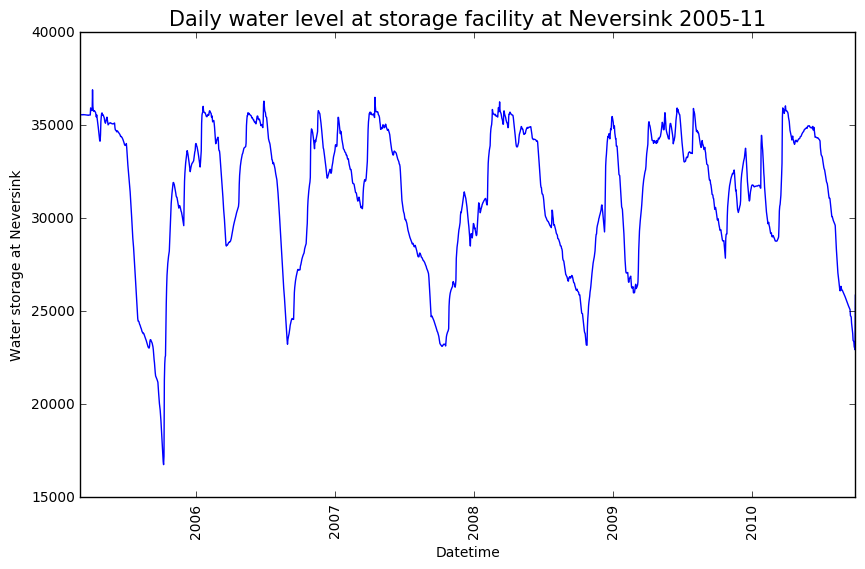

Figure 1: Water level in storage facility at Neversink 2005-11
Source: https://data.cityofnewyork.us/resource/zkky-n5j3.csv


In [130]:
#Plotting the columns one against the other in a scatter plot using the dataframe plot method

plt.plot(water['x'].values,water.y)
pl.ylabel('Water storage at Neversink')
pl.xlabel('Datetime')
plt.xticks(rotation='vertical')
pl.title('Daily water level at storage facility at Neversink 2005-11', size = 15)  
plt.show()
print ('Figure 1: Water level in storage facility at Neversink 2005-11')
print ("Source: https://data.cityofnewyork.us/resource/zkky-n5j3.csv")